<a href="https://colab.research.google.com/github/Goof1999/Design-Optimization/blob/main/Homework%204/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAE 598: Design Optimisation

Homework 4

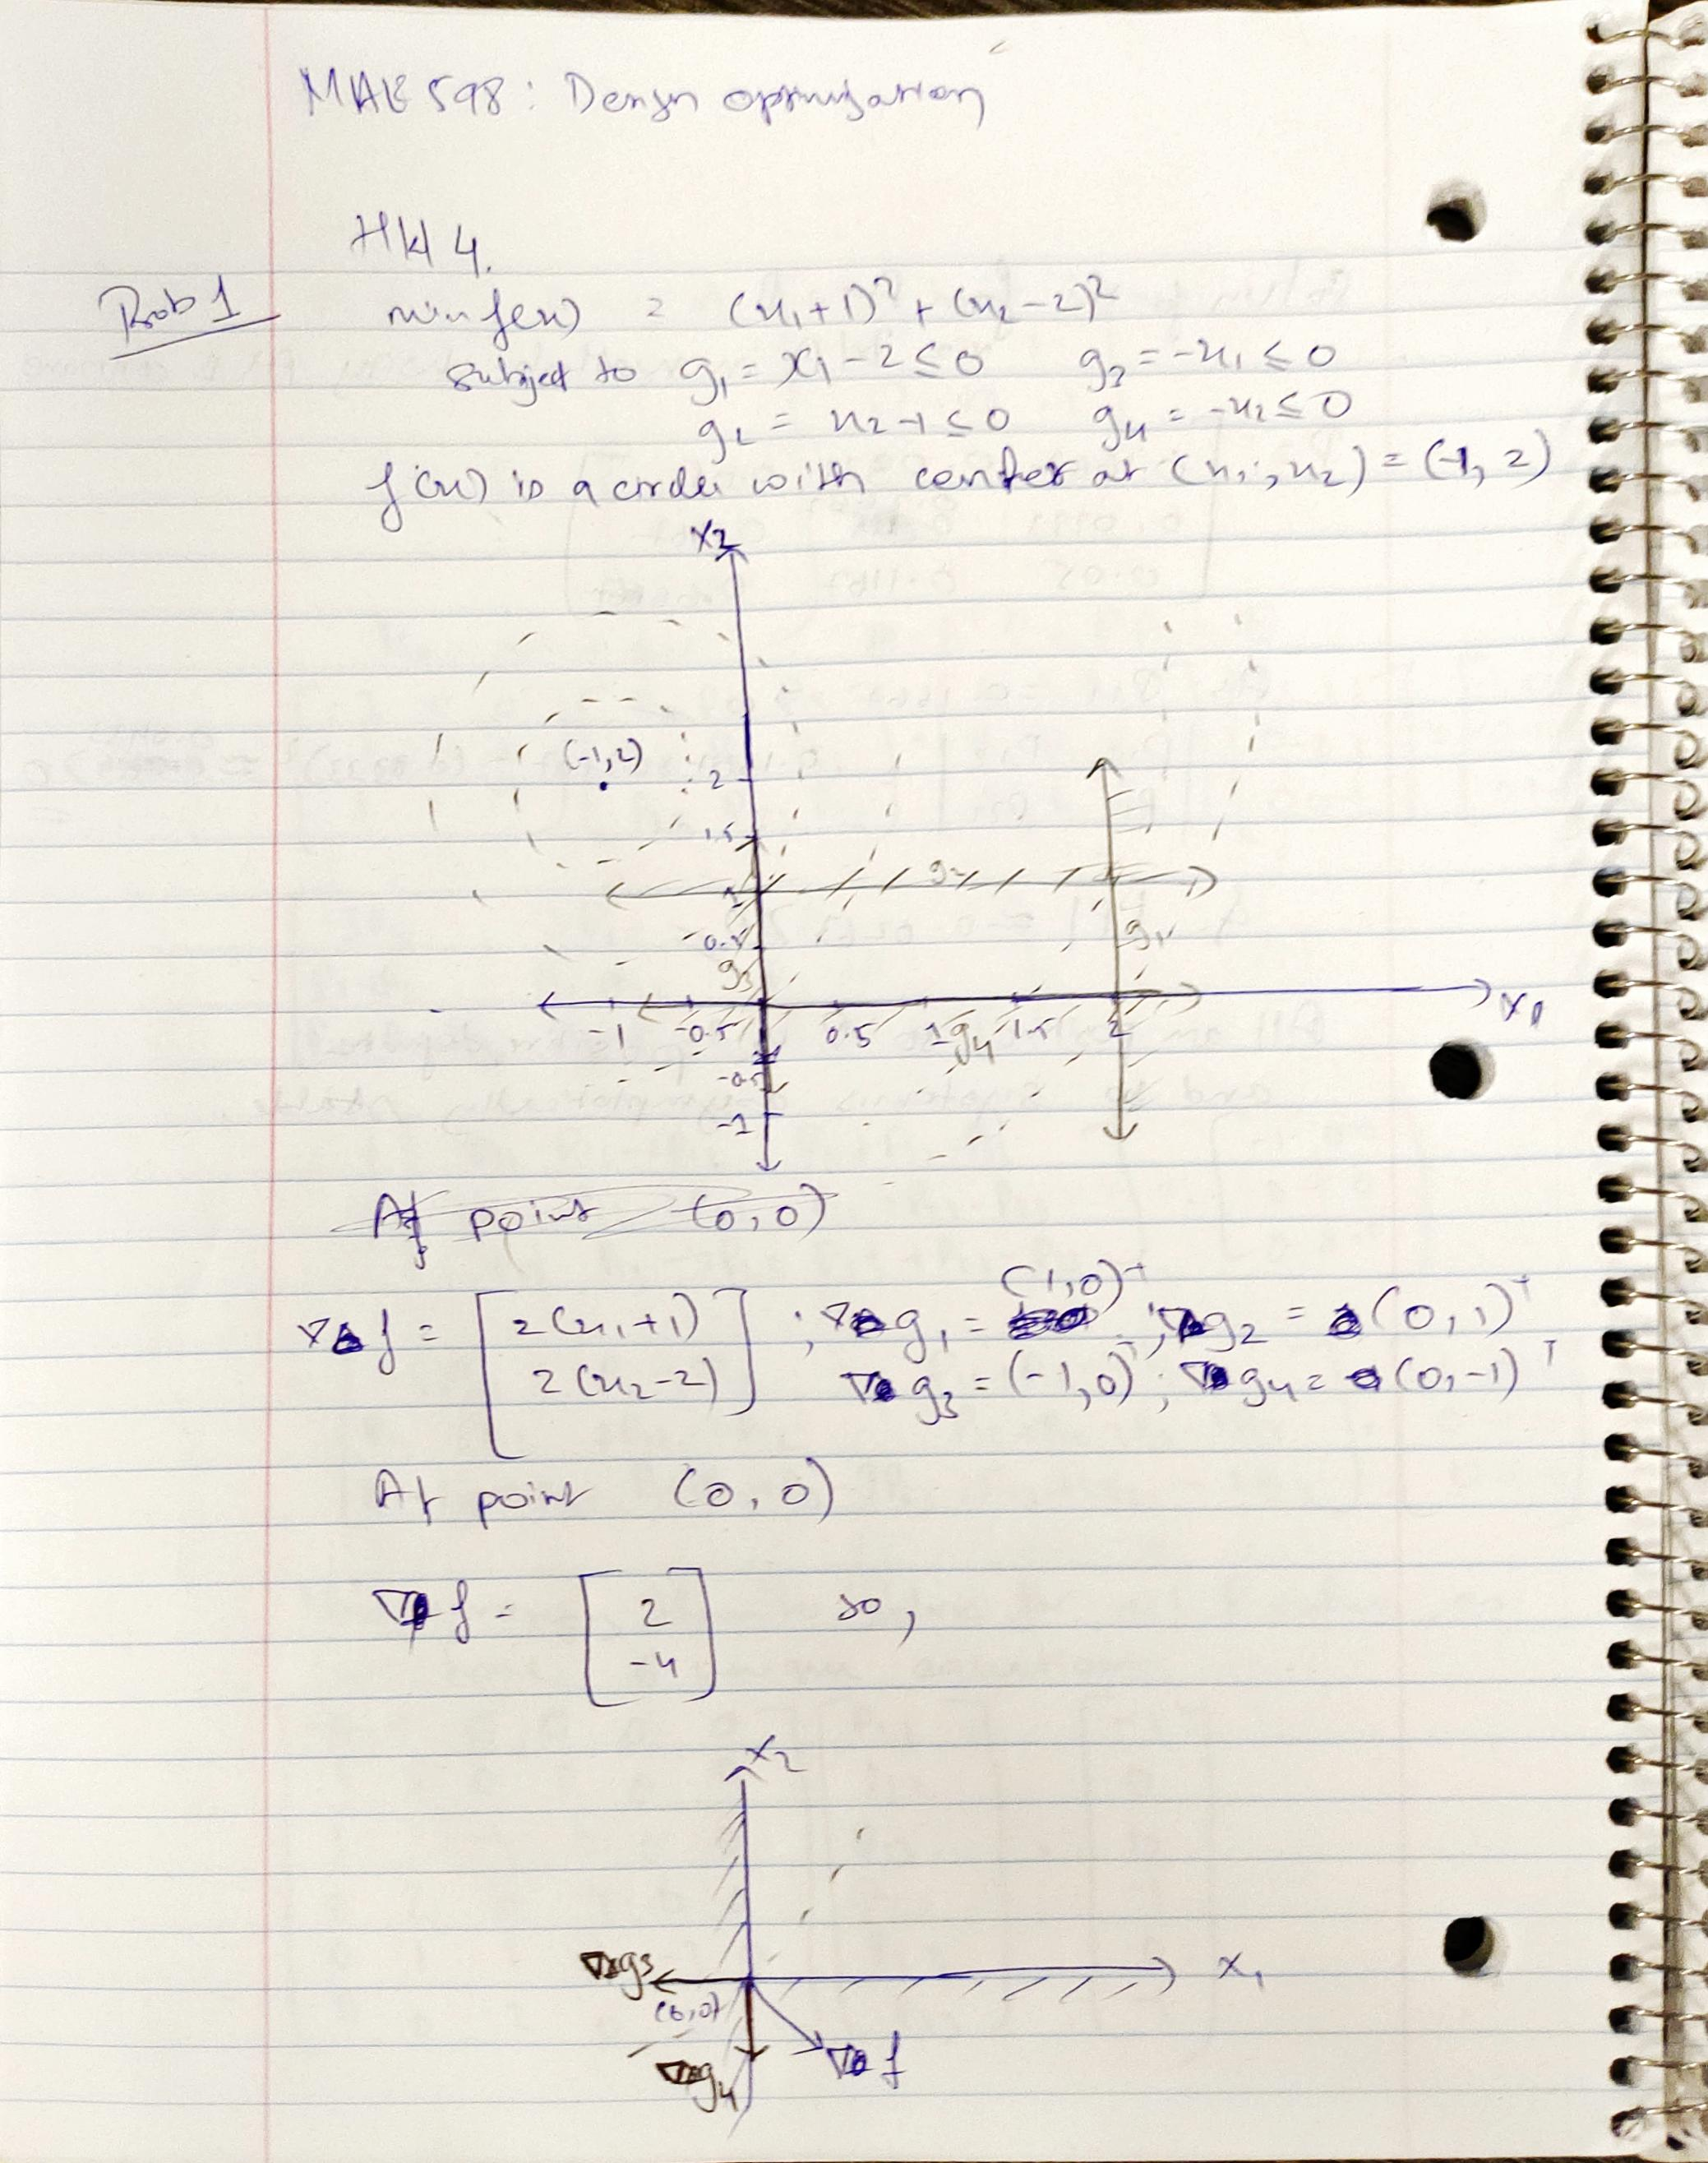

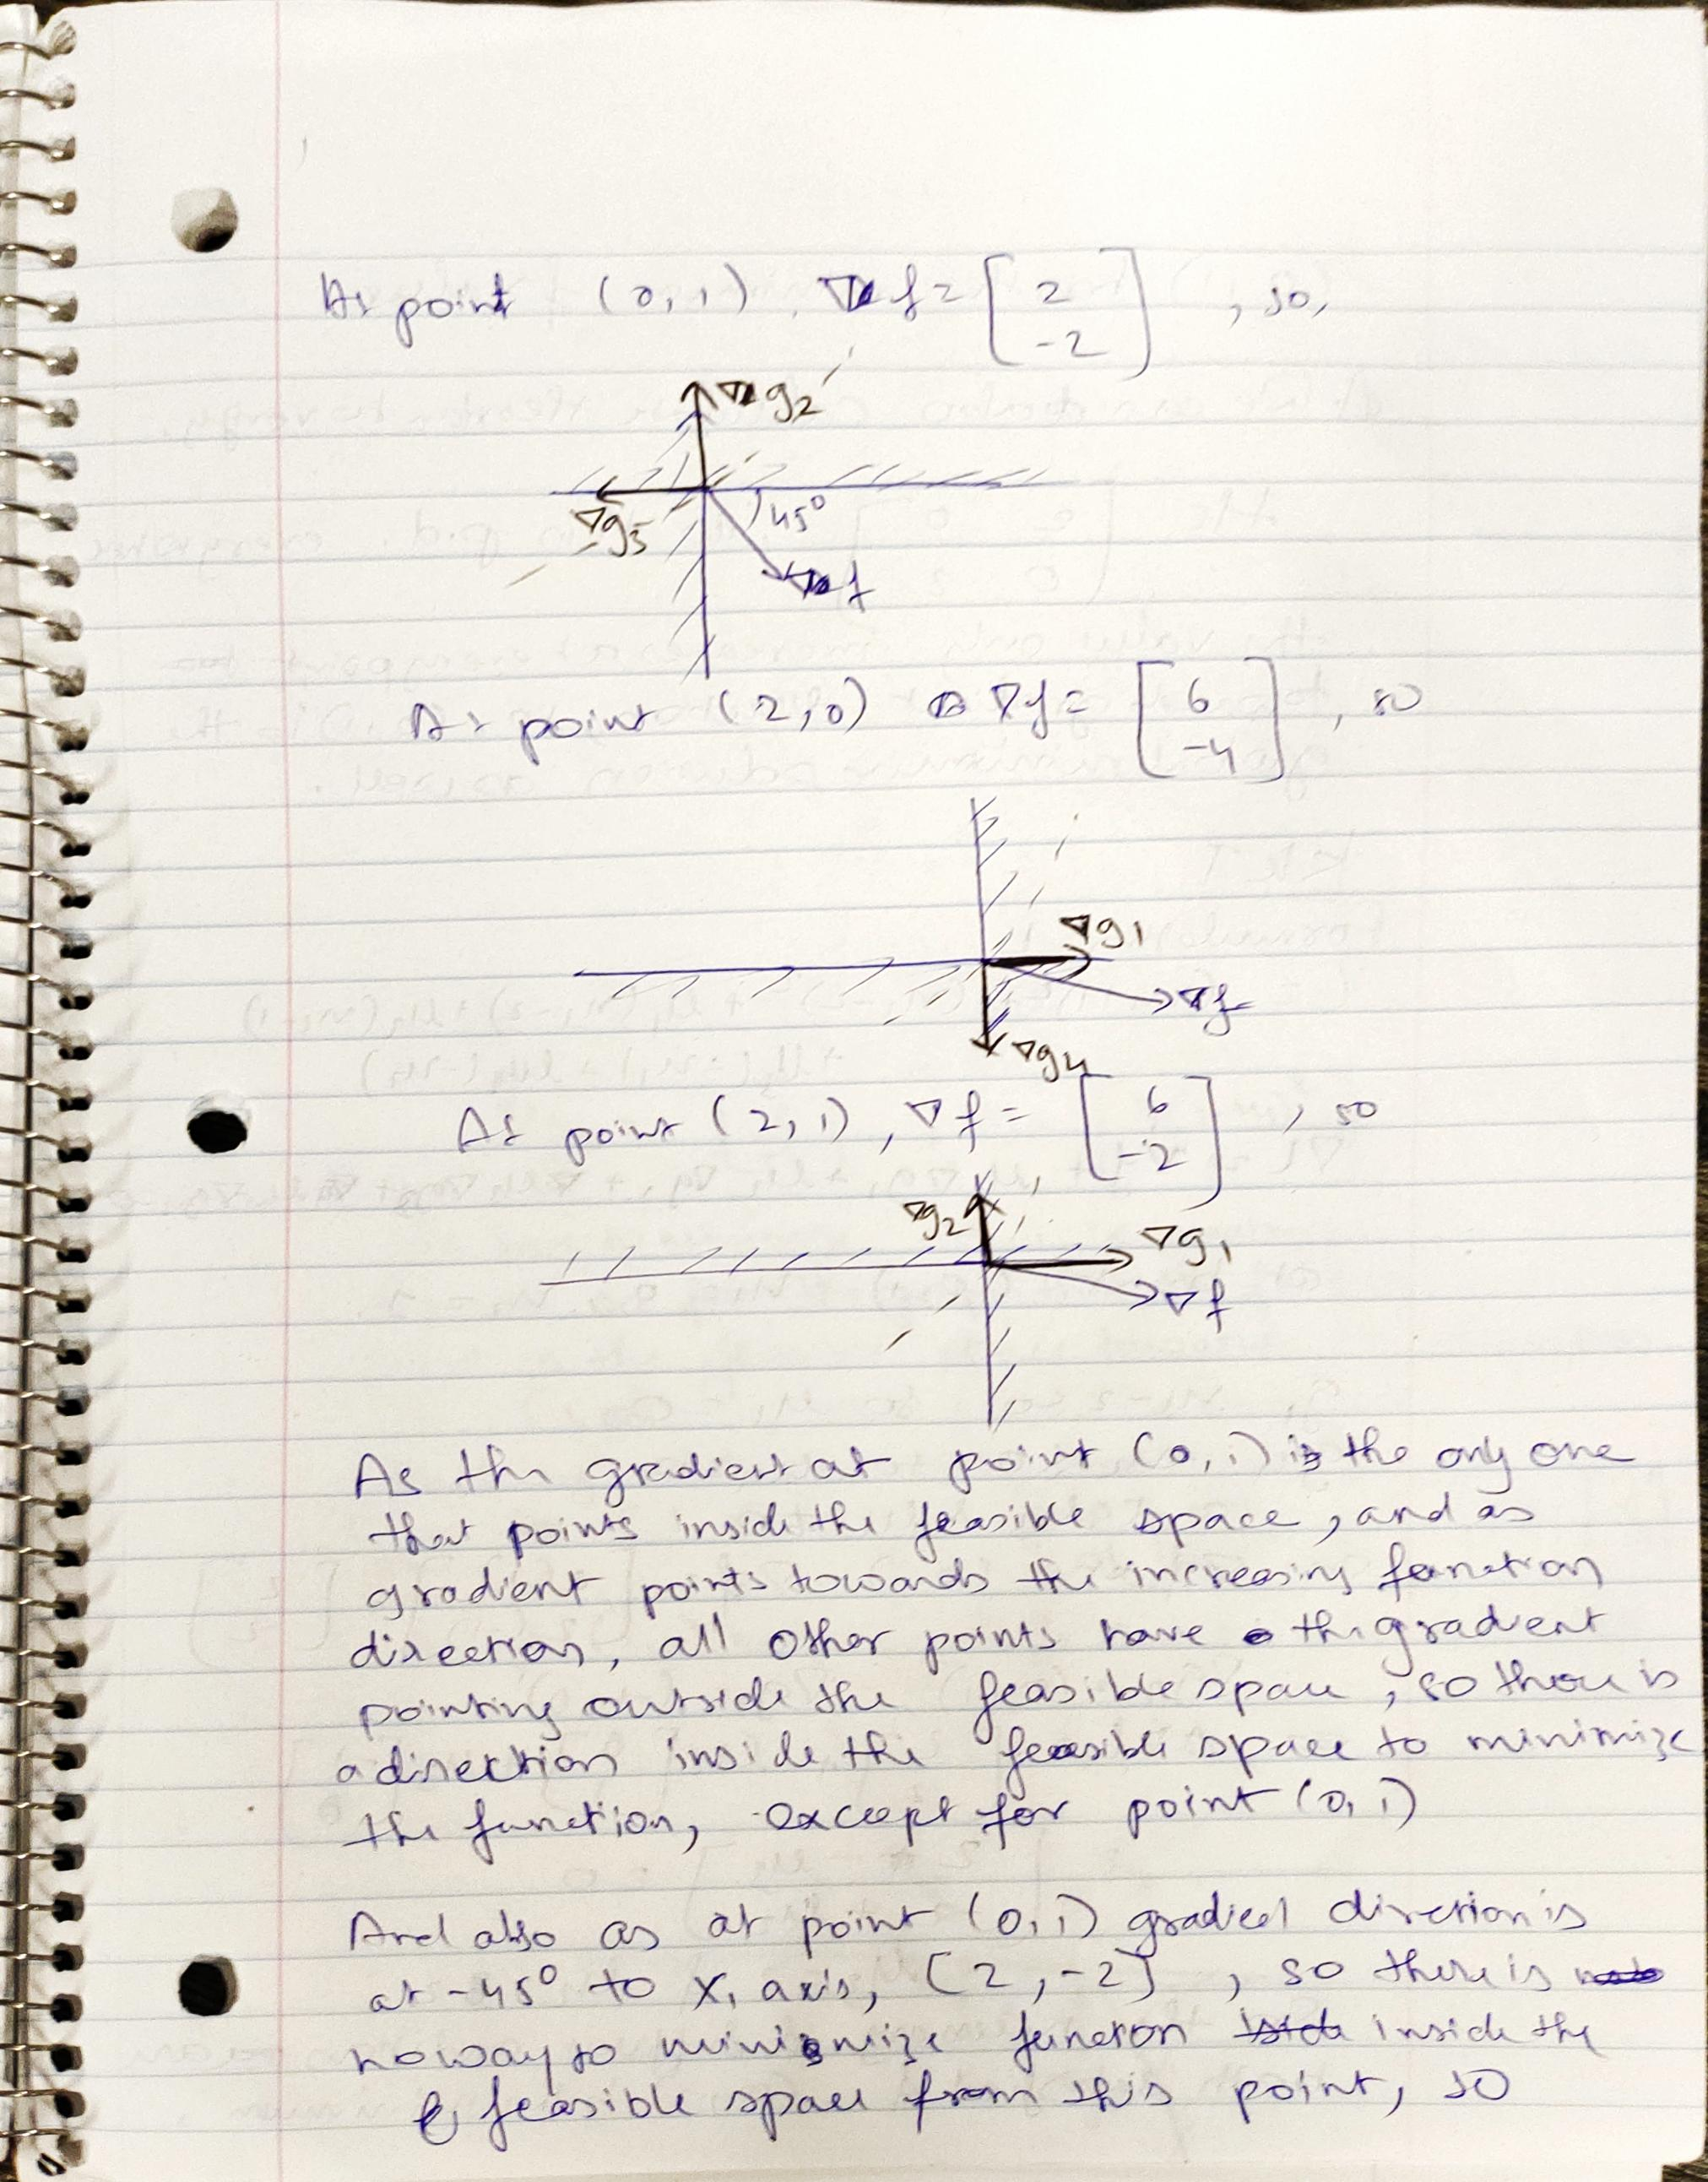

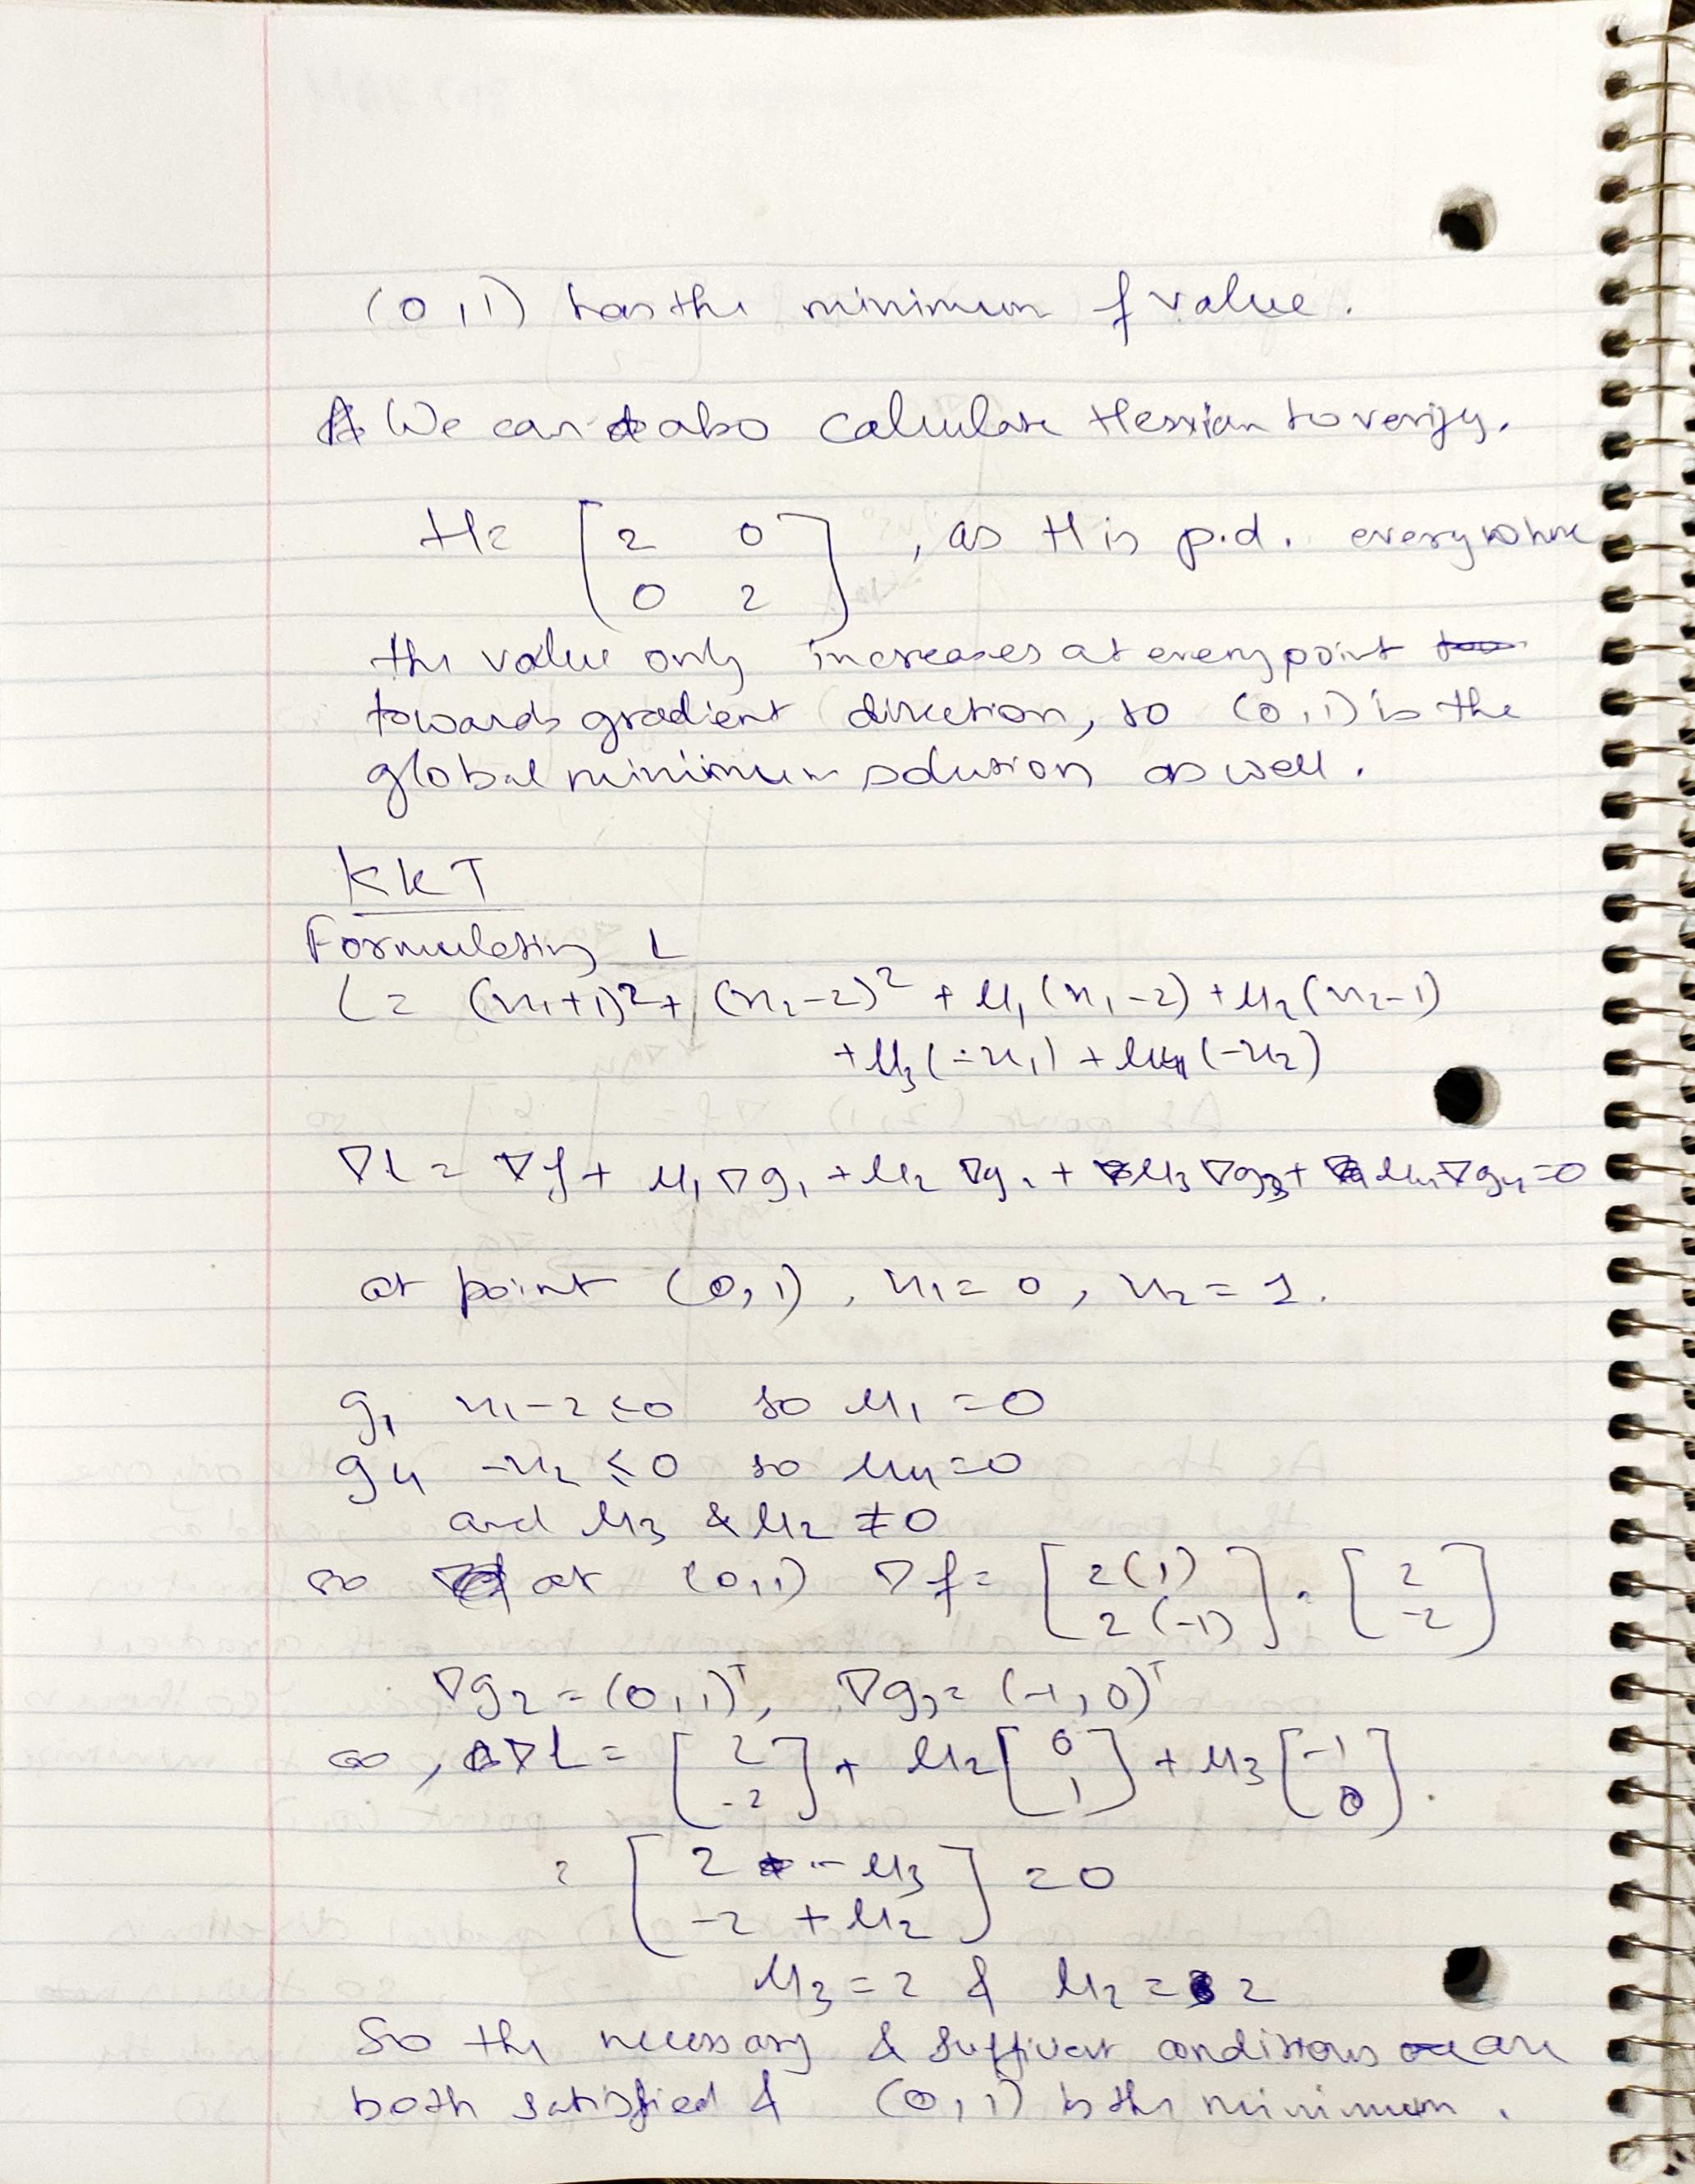

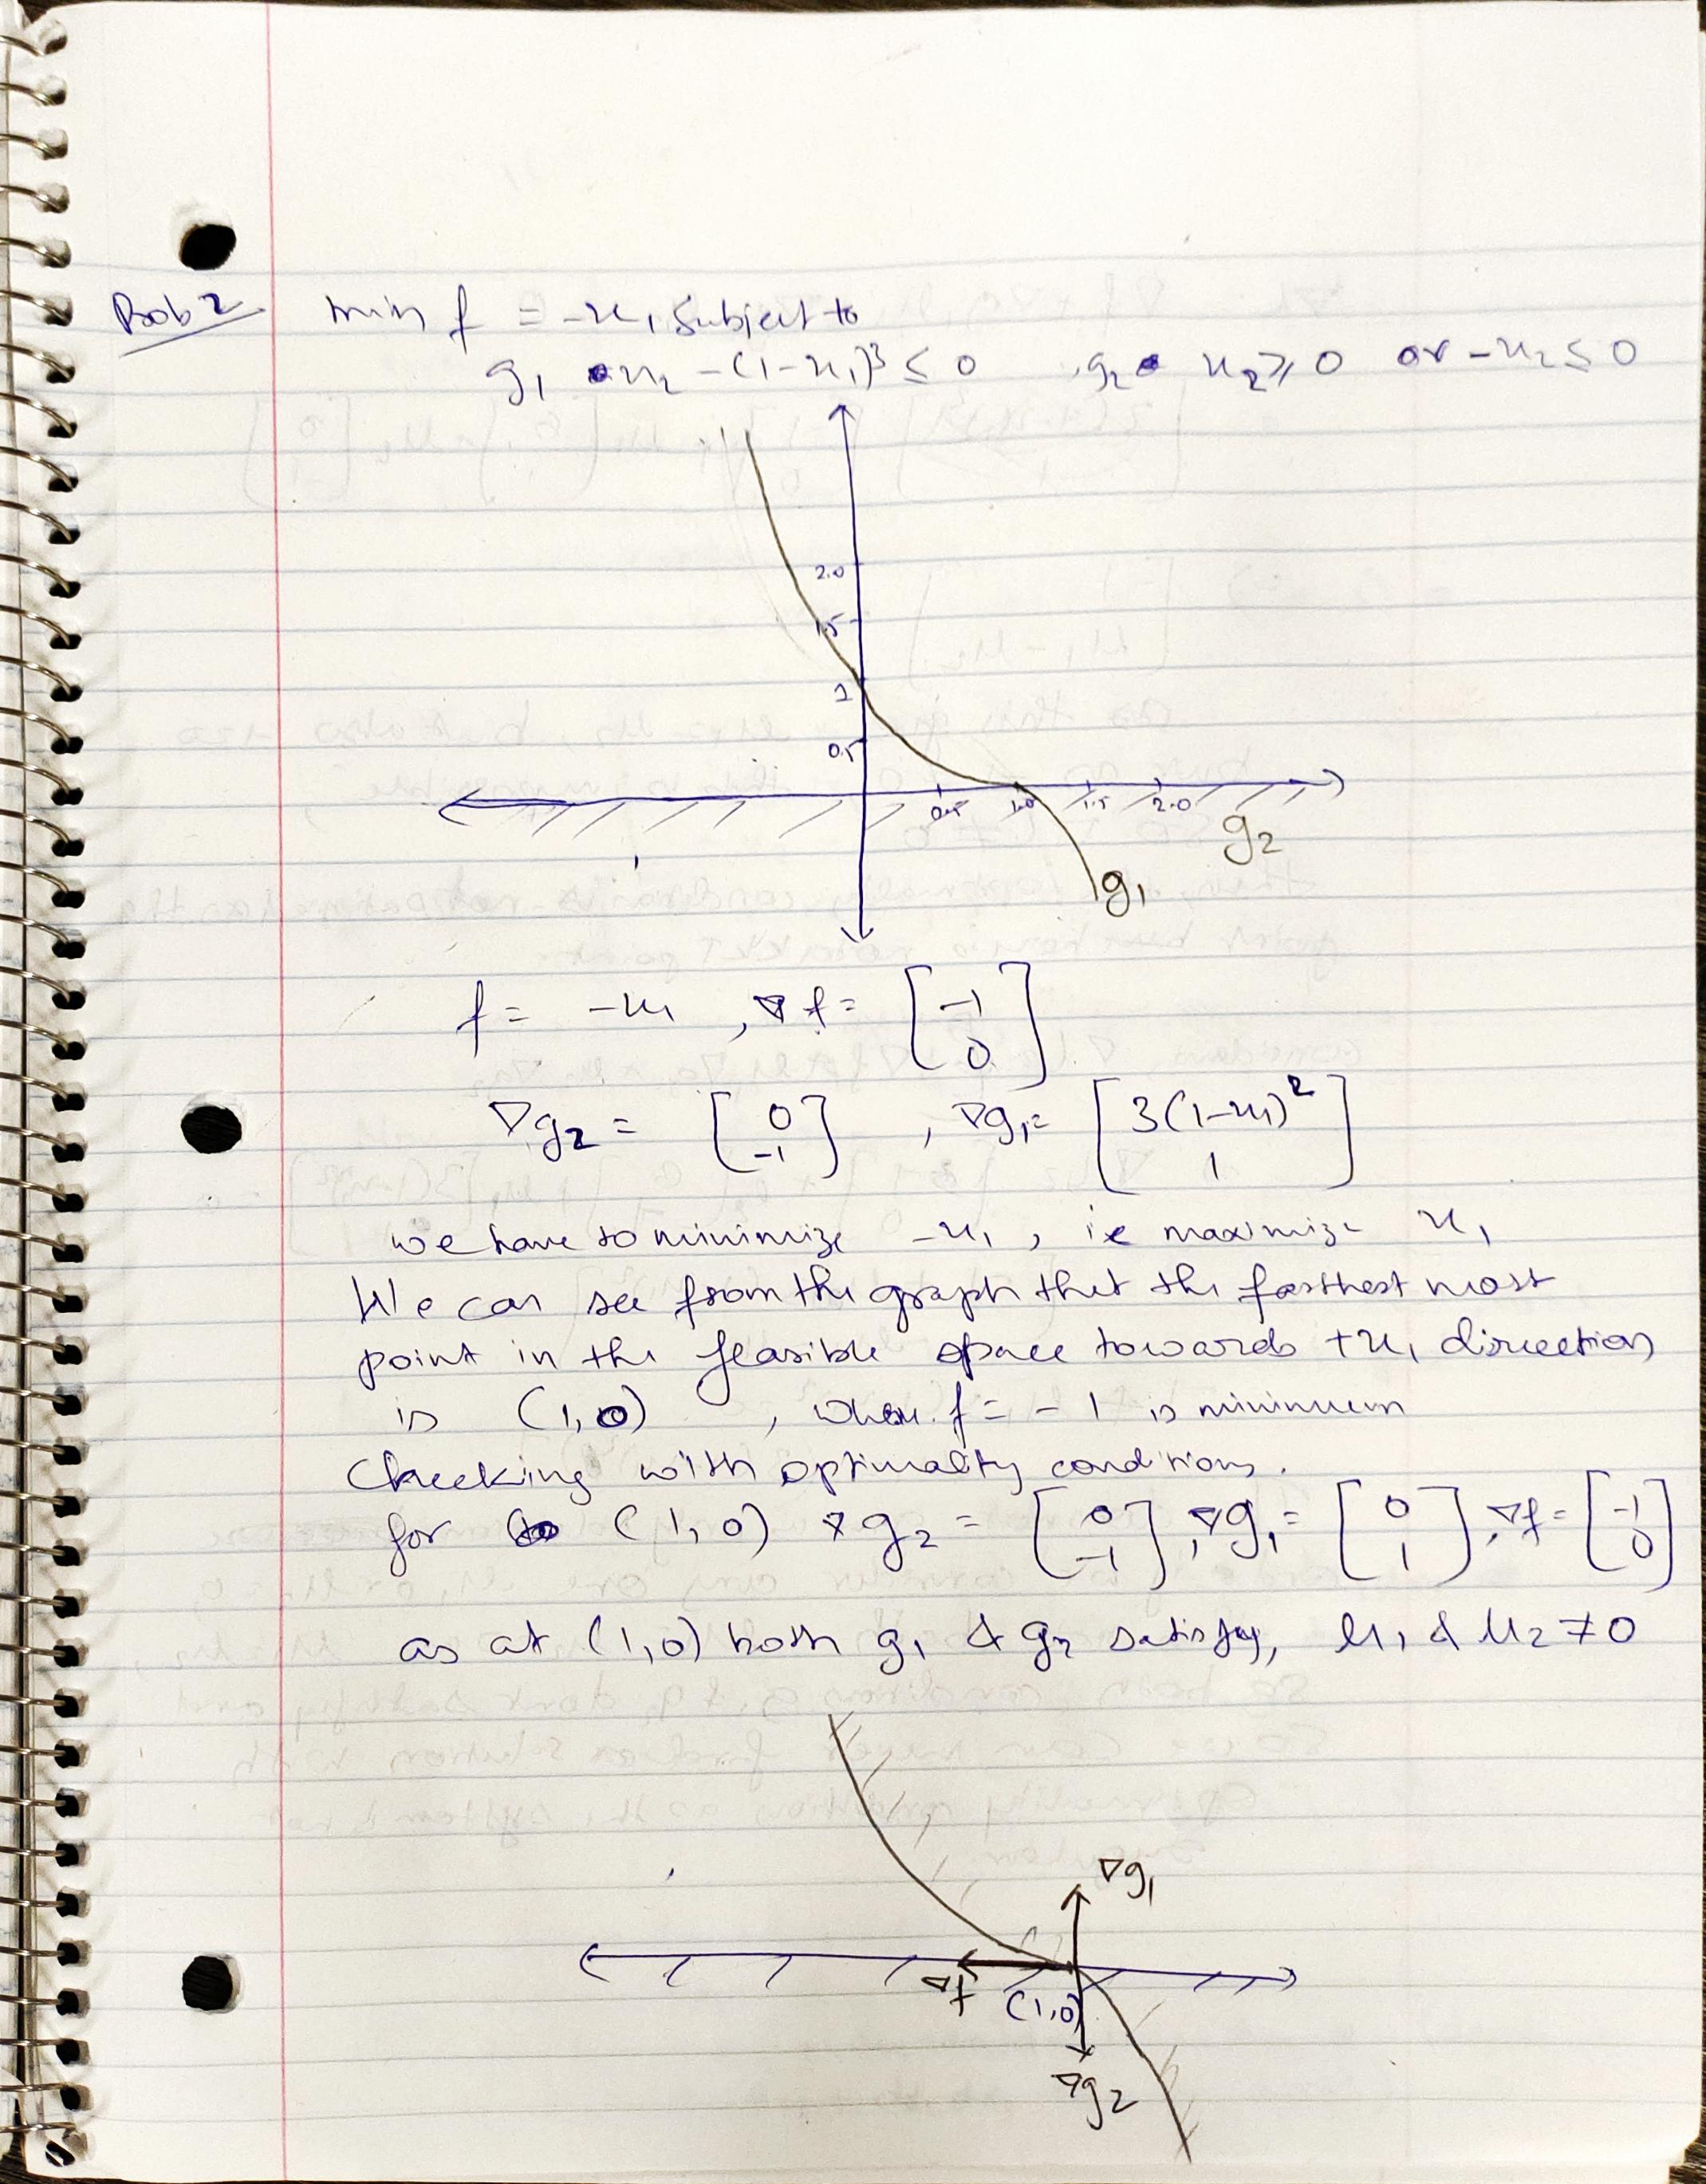

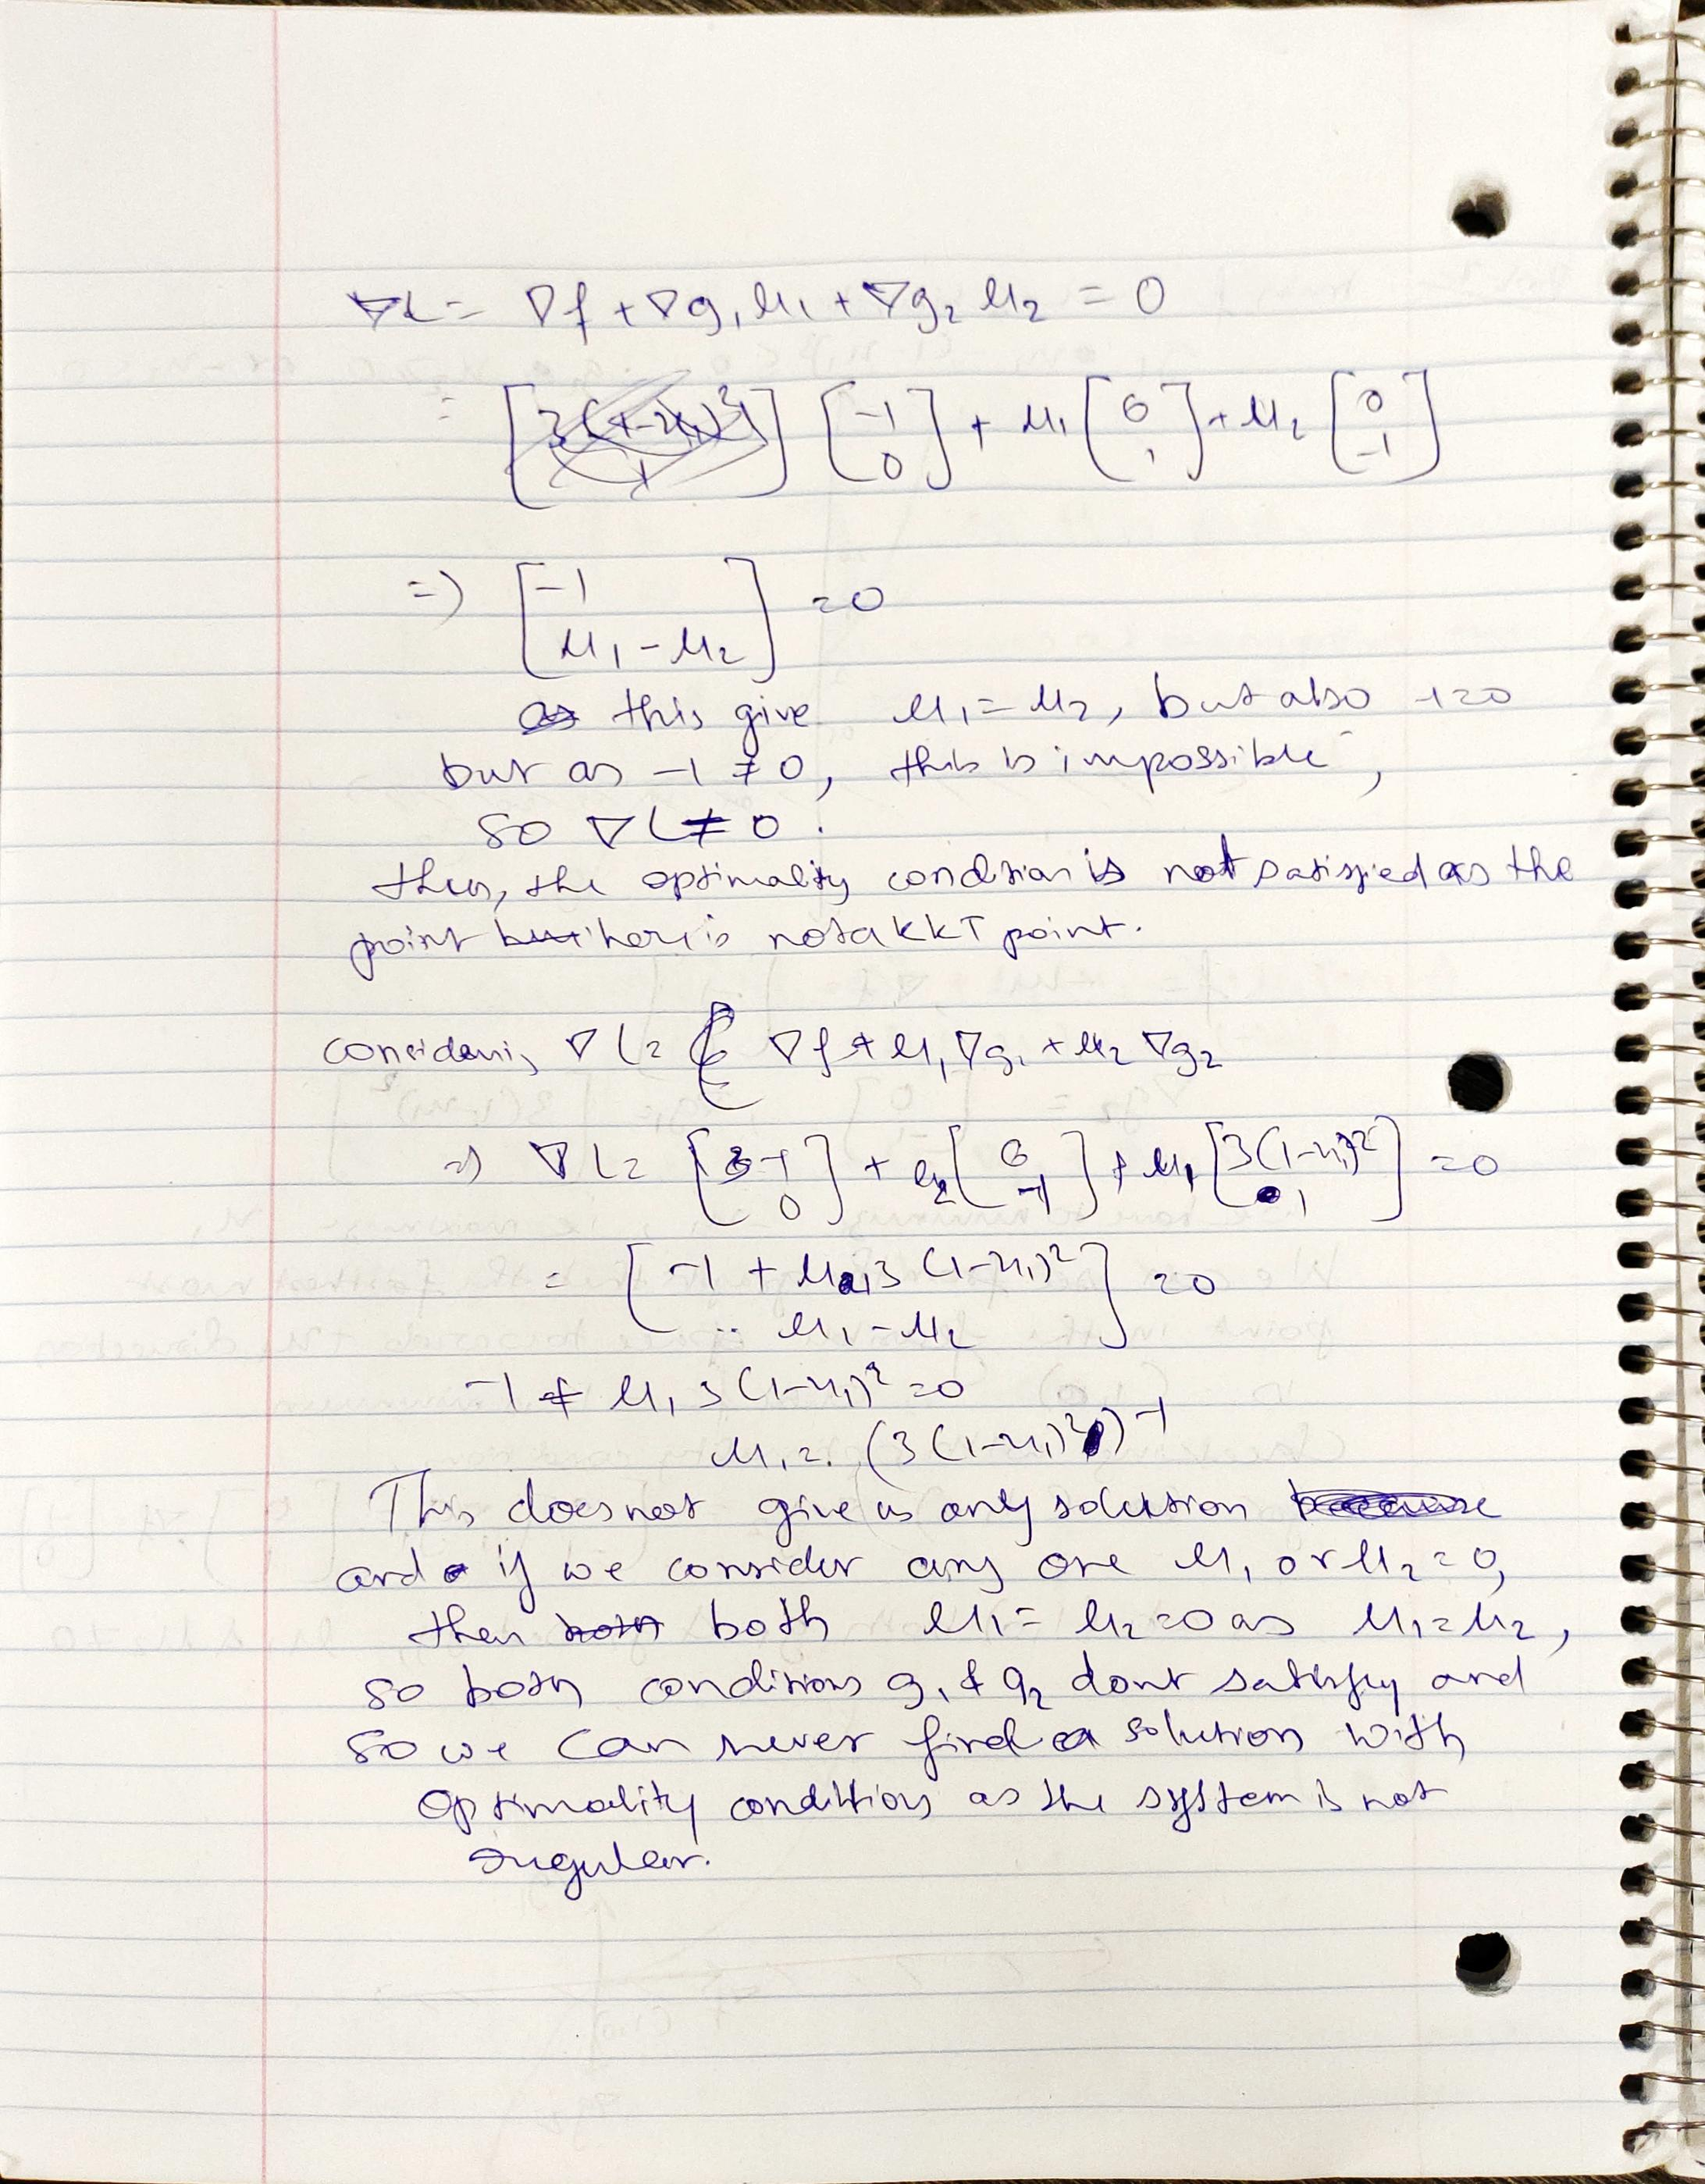

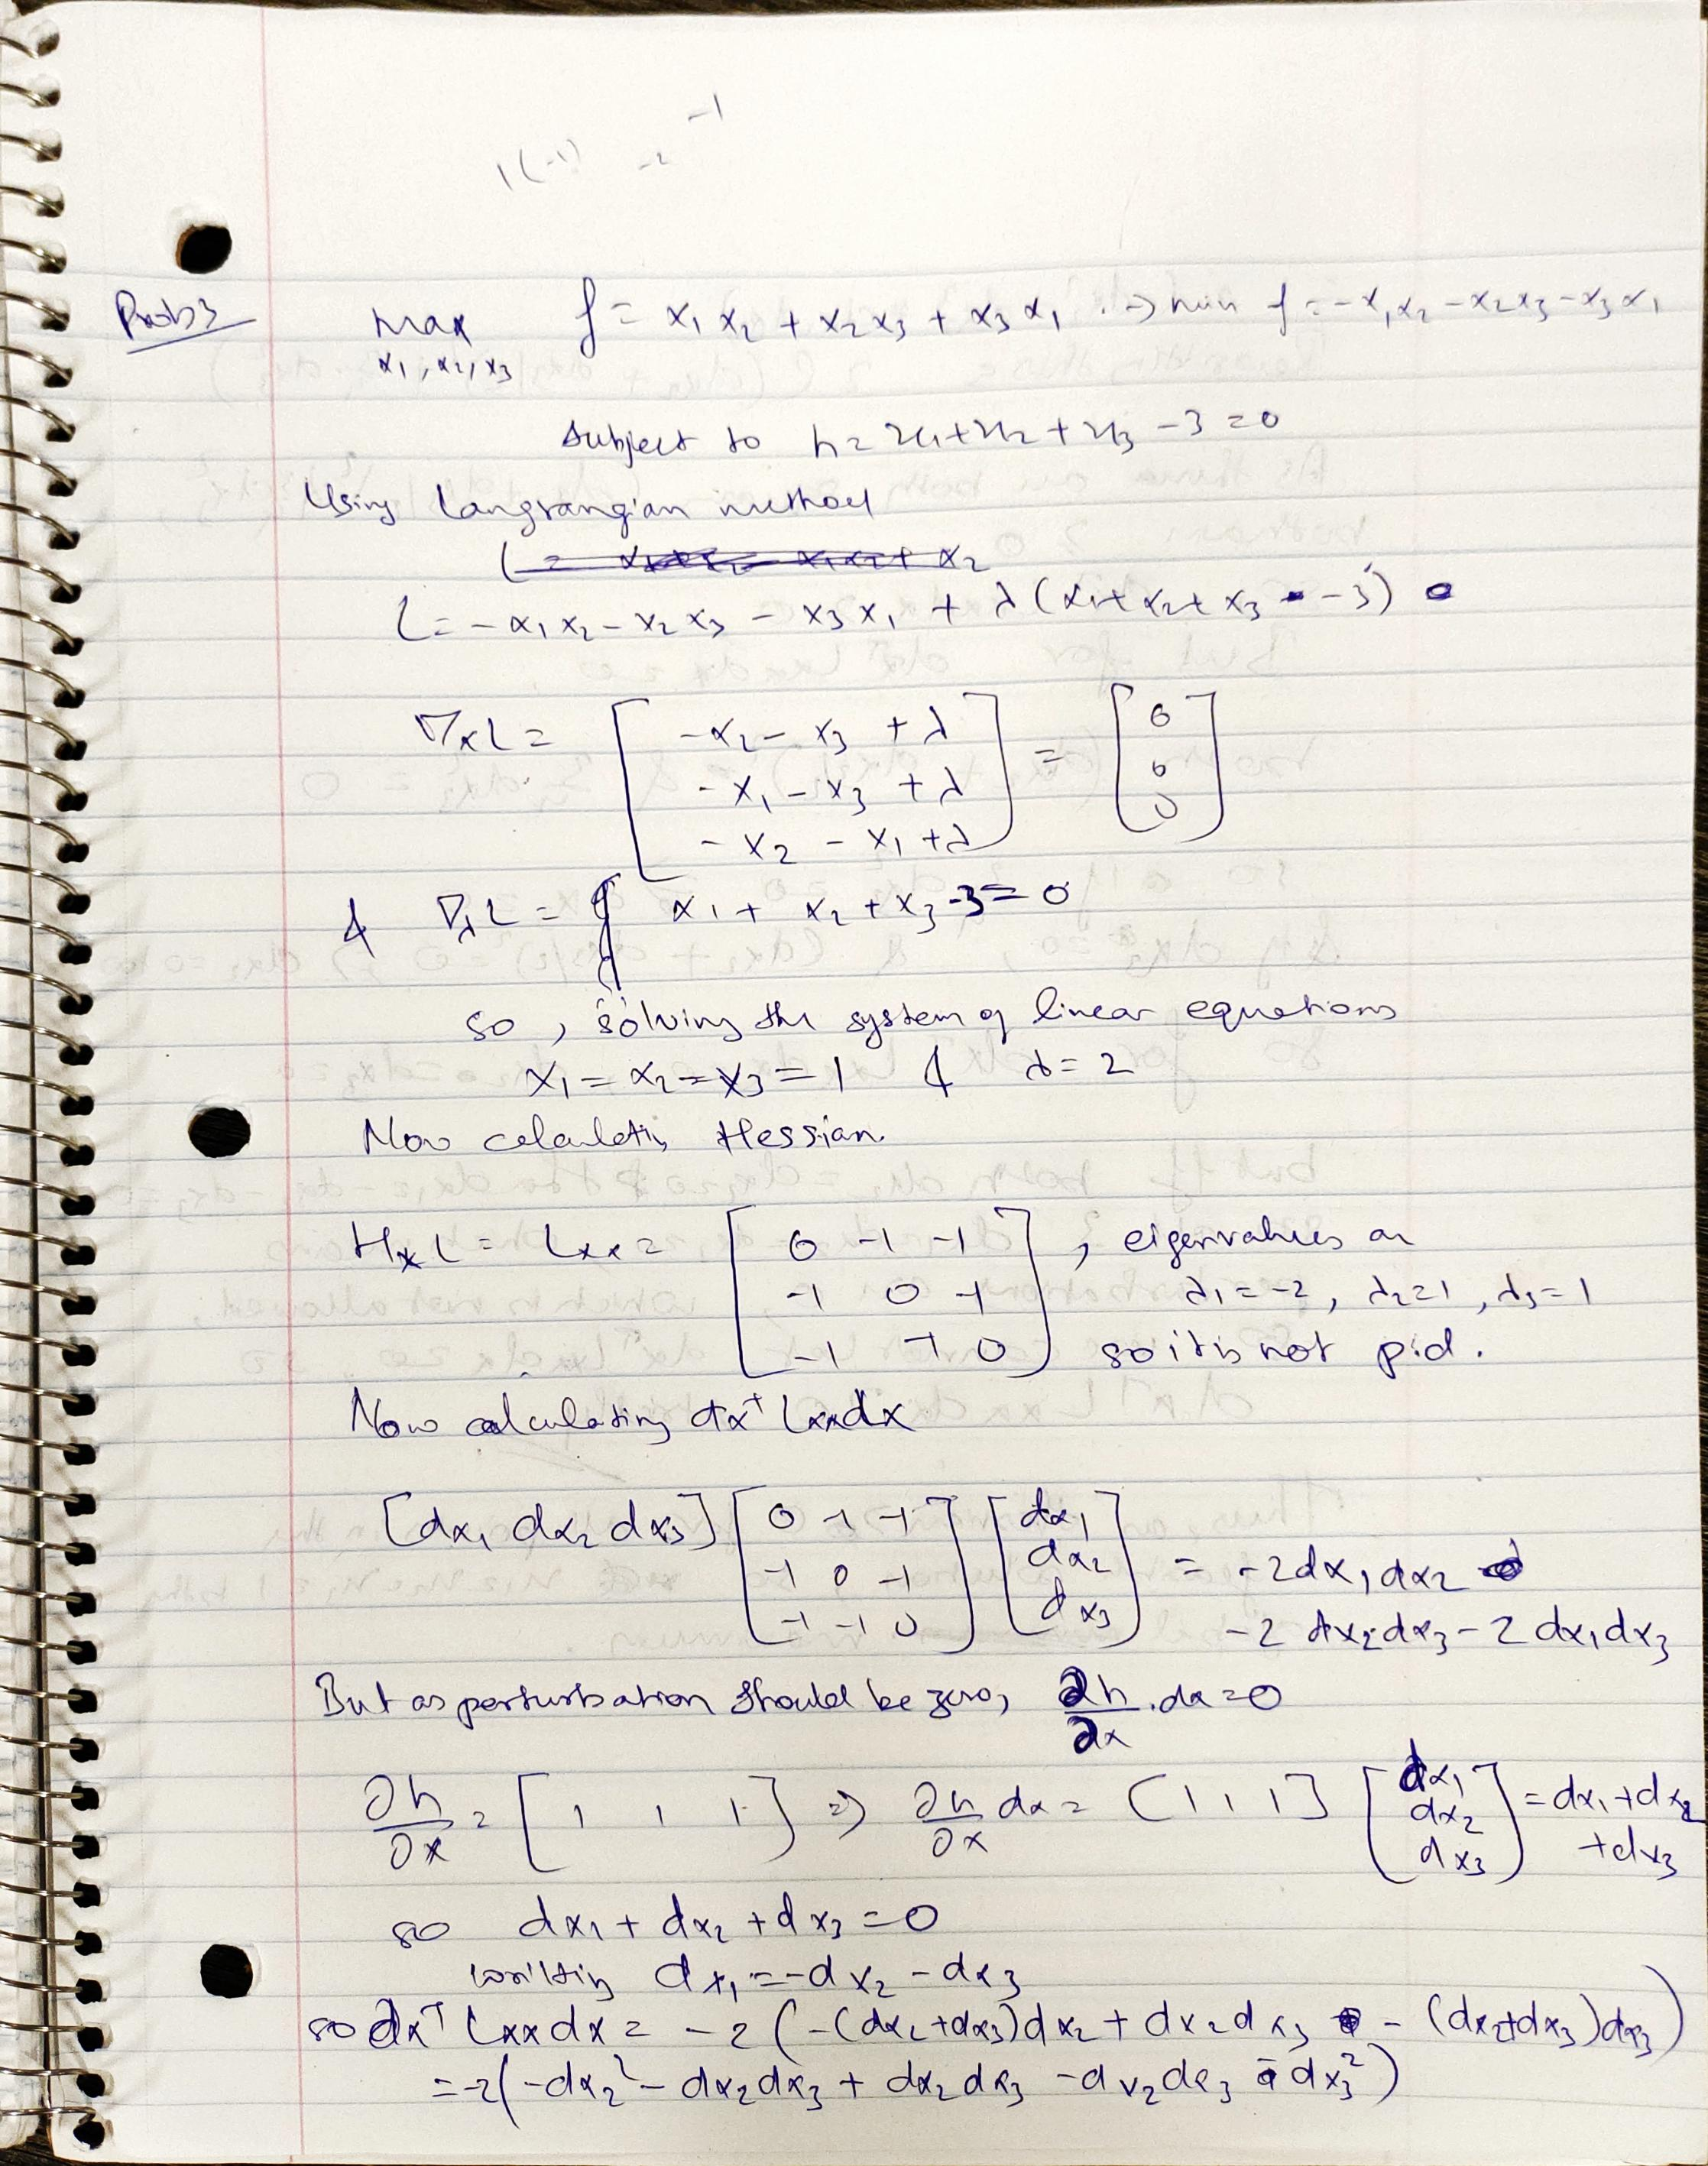

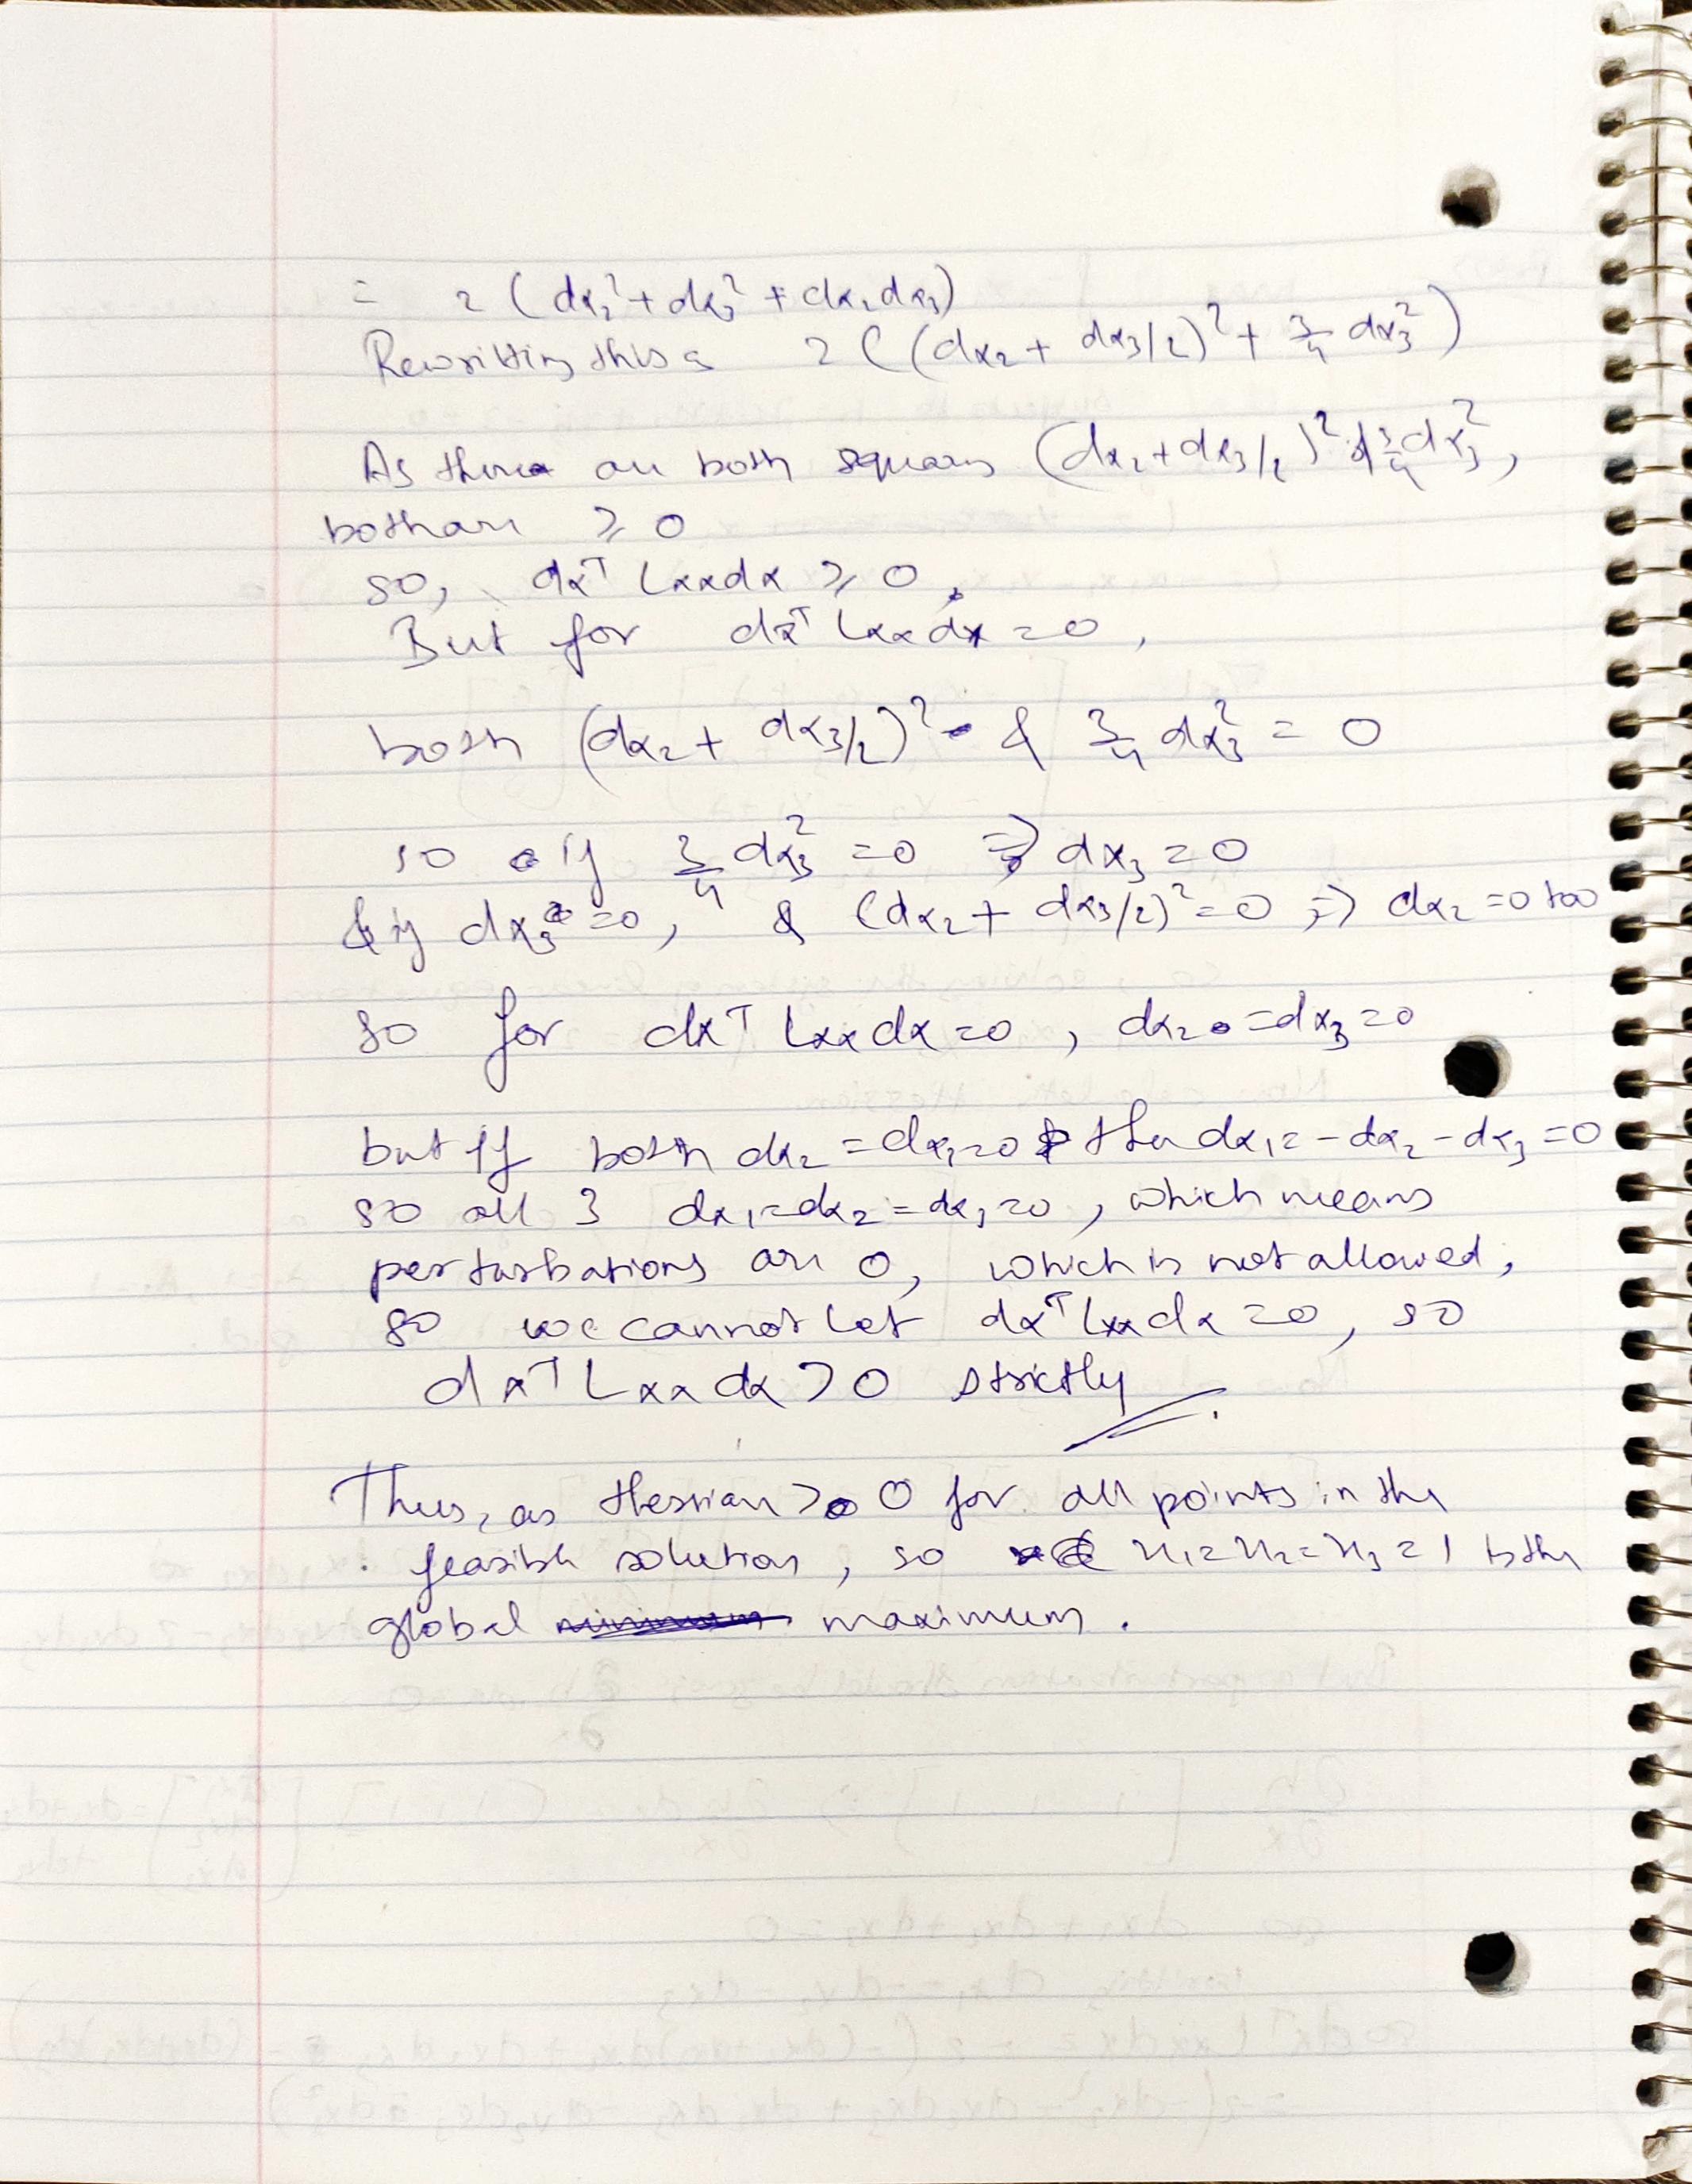

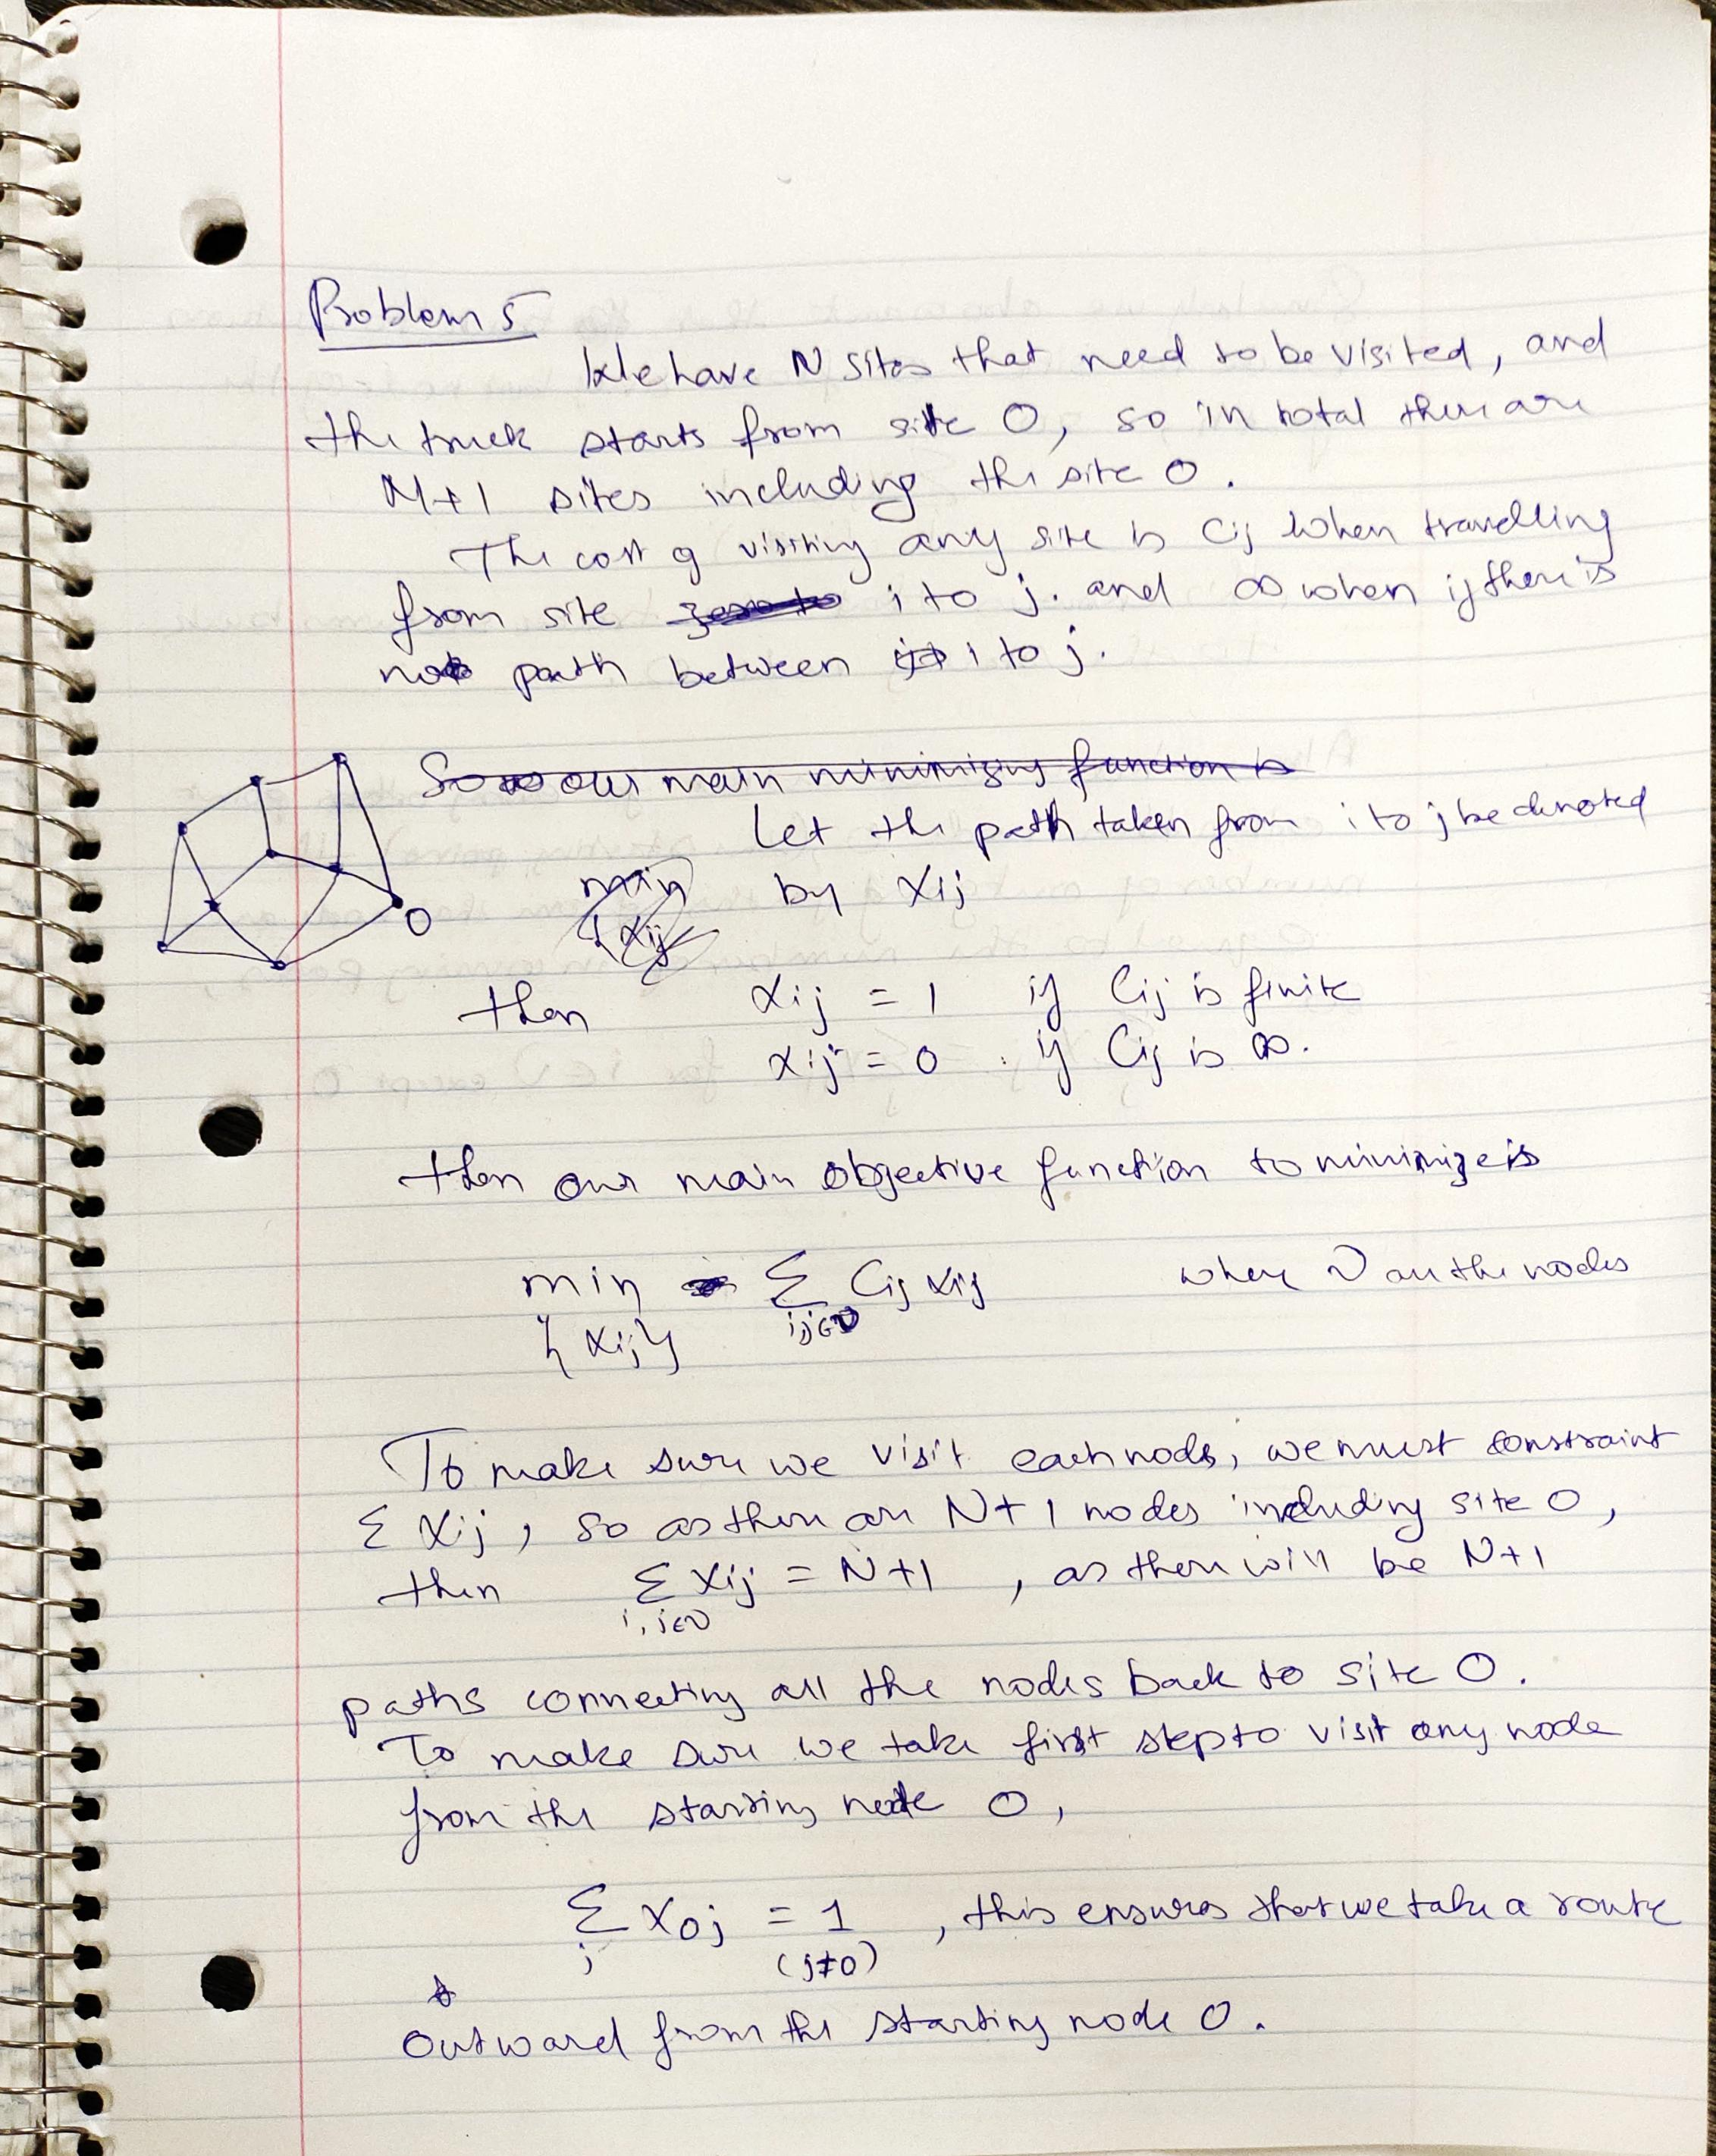

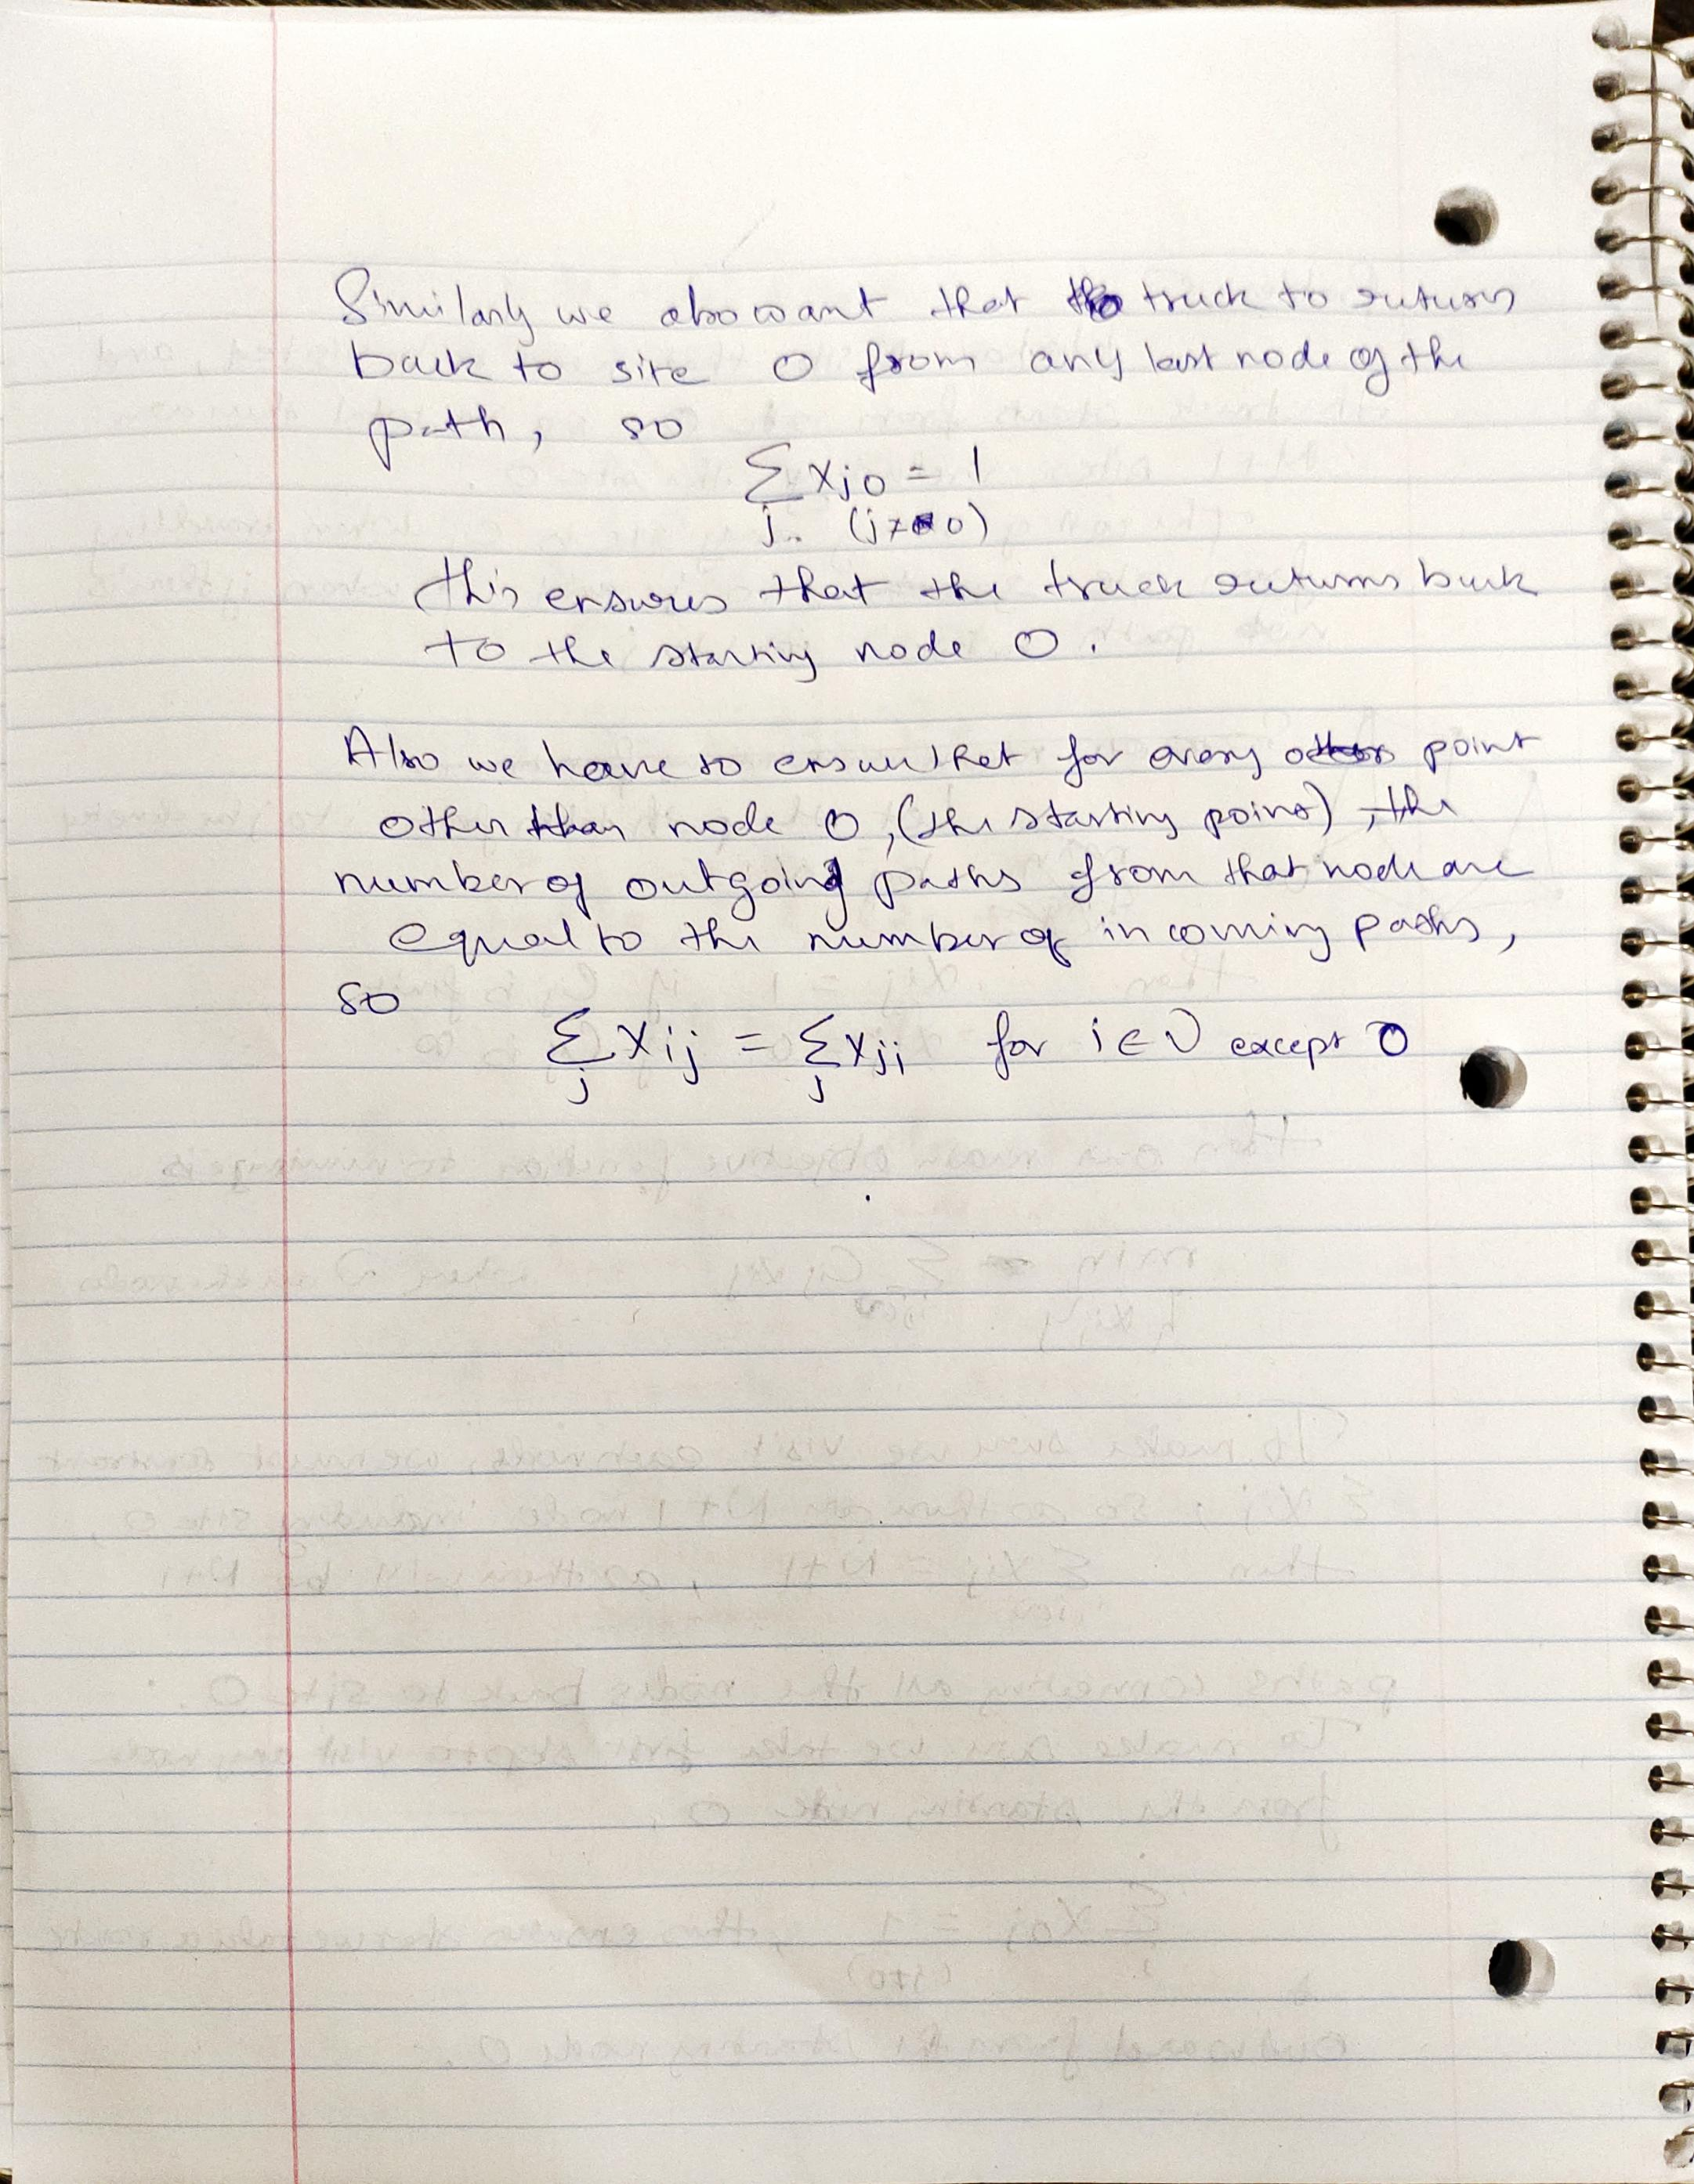

Problem 4:
Solution

In [2]:
import numpy as np
import math

# Defining functions to be used
# Considering x[0]=d, and x[1] & x[2] are s
func = lambda x: x[0]**2+x[1]**2+x[2]**2
h1   = lambda x: x[0]**2/4+x[1]**2/5+x[2]**2/25-1
h2   = lambda x: x[0]+x[1]-x[2]
pdfd = lambda x: 2*x[0]
pdfs = lambda x: np.array([2*x[1],2*x[2]])
pdhd = lambda x: np.array([[x[0]/2],[1]])
pdhs = lambda x: np.array(([[2/5*x[1],2/25*x[2]],[1,-1]]))
dfd  = lambda x: pdfd(x)-np.matmul(np.matmul(pdfs(x),np.linalg.inv(pdhs(x))),pdhd(x))

#Linesearch algorithm
def linesearch(x):
  alpha = 1
  b     = 0.5
  t     = 0.3
  fd = x[0]-alpha*dfd(x)
  fs= x[1:3]+alpha*np.transpose(np.matmul(np.matmul(np.linalg.inv(pdhs(x)),pdhd(x)),np.transpose(dfd(x))))
  fa=func(np.append(fd,fs))
  [phi] = func(x)-alpha*t*dfd(x)**2
  while fa>phi:
      alpha=alpha*b
      fd = x[0]-alpha*dfd(x)
      fs= x[1:3]+alpha*np.transpose(np.matmul(np.matmul(np.linalg.inv(pdhs(x)),pdhd(x)),np.transpose(dfd(x))))
      fa=func(np.append(fd,fs))
      [phi] = func(x)-alpha*t*dfd(x)**2
  return alpha

# Solving algorithm
def solve(x):
  while np.linalg.norm(np.array([[h1(x)],[h2(x)]]))>e:
    x[1:3]=np.transpose(np.transpose([x[1:3]])-np.matmul(np.linalg.inv(pdhs(x)),[[h1(x)],[h2(x)]]))
  return x

# Initial guess
d=1
s1=(-8*d+np.sqrt(64*d**2-4*24*(29*d**2-100)))/48
s2=d+s1
xs=[np.array([d,s1,s2])]
print("Initial guess point is ",xs[-1])
e=10**(-6) # Error tolerance


# Main Algorithm
while np.linalg.norm(dfd(xs[-1]))**2 > e:
  x=xs[-1]
  alpha = linesearch(x)
  x[0]=x[0]-alpha*dfd(x)
  x[1:3]=x[1:3]+alpha*np.transpose(np.matmul(np.matmul(np.linalg.inv(pdhs(x)),pdhd(x)),np.transpose(dfd(x))))
  x=solve(x)
  xs.append(x)

print('The final optimal minimal solution is ',xs[-1])

Initial guess point is  [1.         1.56137011 2.56137011]
The final optimal minimal solution is  [-1.57371899  1.37714652 -0.19657247]
